In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib import cm
from io import StringIO
import pandas as pd

In [2]:
mangaid = '1-43214'
nsa_z = 0.117997
plateifu = '8135-1902'

In [3]:
# open the file
data = fits.open('/Users/natachaupra/Downloads/manga-8135-1902-LOGCUBE.fits.gz')

In [4]:
# retrieve the flux density values
flux = np.transpose(data['FLUX'].data, axes = (2, 1, 0))

# retrieve the ivar values
ivar = np.transpose(data['IVAR'].data, axes = (2, 1, 0))

# retrieve the mask values 
mask = np.transpose(data['MASK'].data, axes = (2, 1, 0))

In [5]:
do_not_use = (mask & 2**10) != 0 

In [6]:
wave = data['WAVE'].data

In [7]:
# sum flux density values element wise to get total flux density
n = len(flux)
sumflux = np.zeros(4563)
    
for i in range(n):
    for j in range(n):
        flux[i,j] = flux[i,j] * ~do_not_use[i,j]
        sumflux = np.add(sumflux, flux[i,j])

In [8]:
start = 5575
end = 5650
# start = 5500
# end = 5700
height = 1000

In [9]:
# select peak region
yaxis = np.where(np.logical_and(wave > start, wave < end))[0]
# print(yaxis)
    
yaxis = yaxis[6:32]

print(yaxis)
print(len(yaxis))

[1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893
 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905]
26


In [10]:
flux_compare = [] 
ivar_compare = []
mask_compare = []

for i in yaxis:
    flux_compare.append(flux[:,:,i].flatten())
    ivar_compare.append(ivar[:,:,i].flatten())
    mask_compare.append(do_not_use[:,:,i].flatten())

flux_compare = np.array(flux_compare)
ivar_compare = np.array(ivar_compare)
mask_compare = np.array(mask_compare)

len(flux_compare[0]), len(ivar_compare), len(mask_compare[0])

(1156, 26, 1156)

In [11]:
result = []
sumresult = []

for i in range(len(yaxis)):
    for j in range(len(flux)**2):
        flux_compare_masked = flux_compare[i] * ~mask_compare[i]
        if flux_compare[i][j] != flux_compare_masked[j]:
            print('something')
        # To mask flux_compare by multiplying to the whole mask array. So use i only.
        
        sigma = np.sqrt(1 / ivar_compare[i][j]) if ivar_compare[i][j] != 0 else 0
        
        # Have to mask flux compare -- but mask before or after comparing with sigma ? 
        # My guess = mask first.
        
        if flux_compare_masked[j] < (3 * sigma):
            
            result.append(0)
        else:
            result.append(flux_compare_masked[j])
    sumresult.append(np.sum(result))
    result = []
    
    #True True .... True True

In [12]:
index = 0
sumresult[index]

182.81499693356454

In [13]:
# check the redhsift
a = 5007 * (1 + nsa_z)

In [14]:
threshold = 201.87

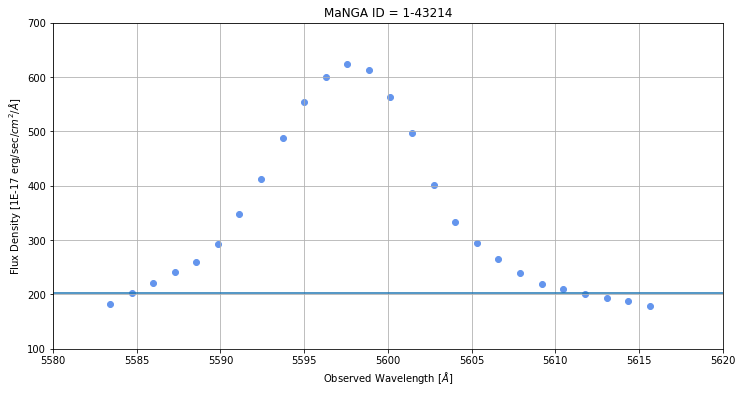

In [16]:
plt.figure(figsize = (12,6))
plt.grid()
plt.ylim(100, 700)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title('MaNGA ID = ' + mangaid)
plt.scatter(wave[yaxis[0] : yaxis[-1] + 1], sumresult, color = 'cornflowerblue', marker ="o")

plt.xlim(5580,5620)
plt.axhline(threshold)

# plt.savefig('Images/WholeFlux_{}'.format(mangaid), bbox_inches = 'tight')

In [17]:
index_left = np.where((wave > 5580) & (wave < 5585))
index_left #1881

(array([1878, 1879, 1880, 1881]),)

In [18]:
index_right = np.where((wave > 5610) & (wave < 5615))
index_right #1902

(array([1901, 1902, 1903, 1904]),)

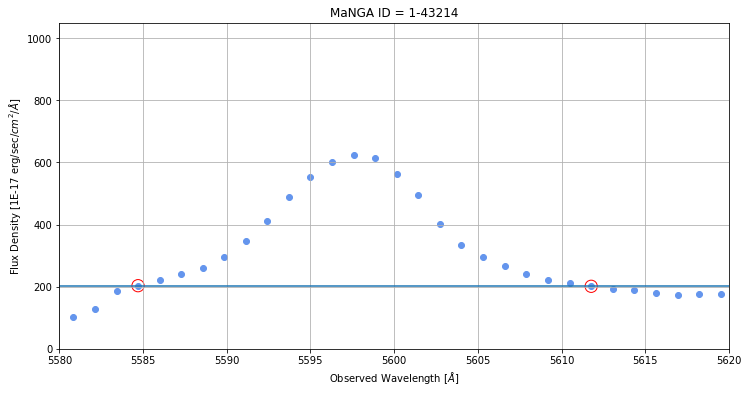

In [19]:
plt.figure(figsize = (12,6))
plt.grid()
plt.ylim(0, 1050)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title('MaNGA ID = ' + mangaid)
plt.scatter(wave, sumflux, color = 'cornflowerblue')

plt.xlim(5580,5620)
plt.axhline(threshold)

plt.scatter(wave[1881], sumflux[1881], facecolors = 'none', s = 150, color = 'red')
plt.scatter(wave[1902], sumflux[1902], facecolors = 'none', s = 150, color = 'red')

In [20]:
left_data = (wave[1881], sumflux[1881])
right_data = (wave[1902], sumflux[1902])
print(left_data)
print(right_data)
# As you can see here, the y axis of both points are not the same

(5584.701947368307, 203.18170495401137)
(5611.771769773147, 201.2296138643287)


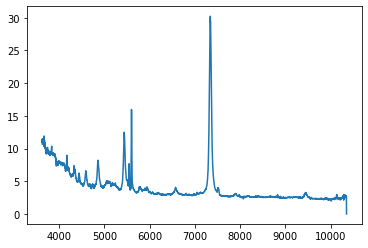

In [23]:
flux_header = data['FLUX'].header
x_center = int(flux_header['CRPIX1']) - 1
y_center = int(flux_header['CRPIX2']) - 1

plt.plot(wave, flux[x_center, y_center])


In [27]:
flux[x_center, y_center] * ~do_not_use[x_center, y_center]

array([11.234604 , 11.00428  , 11.17683  , ...,  2.7332976,  2.4263654,
        0.       ], dtype=float32)

In [28]:
type(do_not_use[x_center, y_center])

numpy.ndarray

In [29]:
type(flux[x_center, y_center])

numpy.ndarray